# Load the dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset 
file_path = 'AICourses/CCPP_data.csv'  # Replace with the actual path to your file
df = pd.read_csv(file_path)
print(df.head())
print("Shape of the Dataset: {}".format(df.shape))

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
Shape of the Dataset: (9568, 5)


In [3]:
# Separate input features from the target 
X = df.drop("PE", axis=1).values
y = df["PE"].values

## Visualise the data

A correlation heatmat indicates colinearity of data in order to identify candidate features to drop 

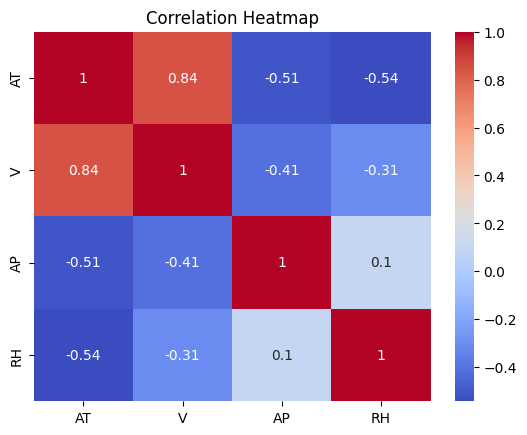

In [4]:
features = ["AT", "V", "AP", "RH"]
corr_matrix = df[features].corr()

# Create heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")  # Annotate with values and use a colormap
plt.title("Correlation Heatmap")
plt.show()

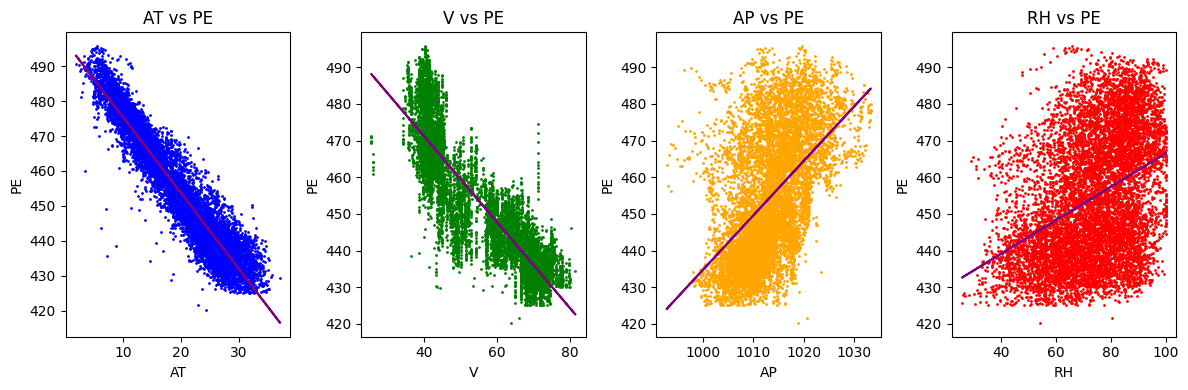

In [5]:
# Plot the data, one feature against targeteach time
plt.figure(figsize=(12, 4))
colors = ['blue', 'green', 'orange', 'red']

features = ['AT', 'V', 'AP', 'RH']

for i, feature in enumerate(features):
    plt.subplot(141 + i)
    plt.scatter(df[feature], df['PE'], s=1, c=colors[i])
    plt.xlabel(feature)
    plt.ylabel('PE')
    plt.title(f"{feature} vs PE")

    # Obtain and plot regression line
    slope, intercept = np.polyfit(df[feature], df['PE'], 1)
    plt.plot(df[feature], slope * df[feature] + intercept, color='purple', label='Regression Line')

plt.tight_layout()
plt.show()

## Identify outliers in the data

Use of box plots and Gaussian distribution to see which features have outliers

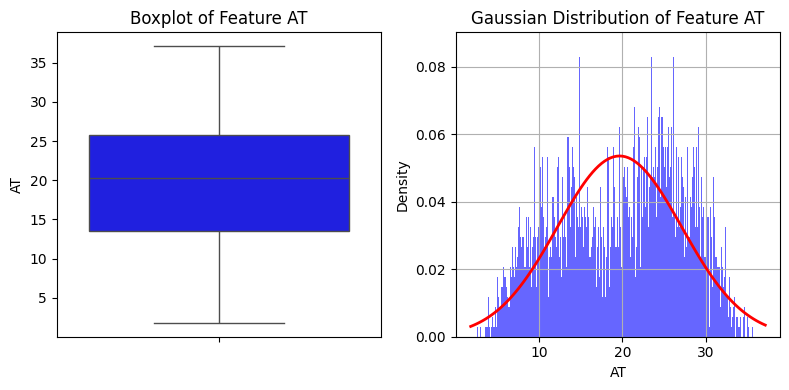

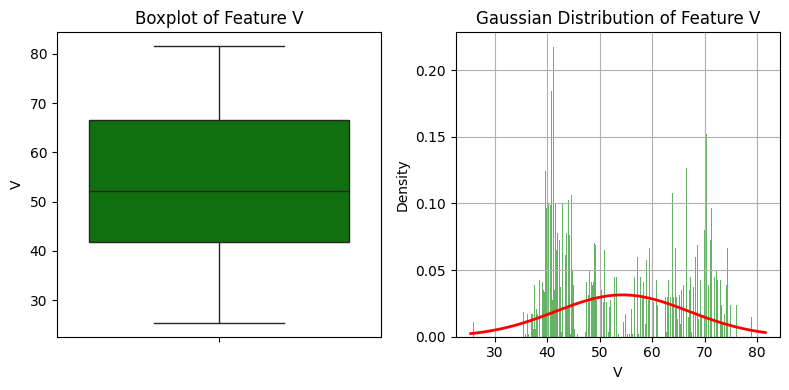

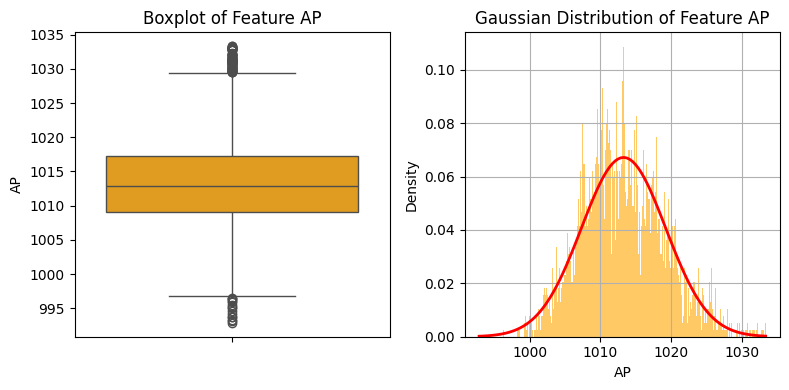

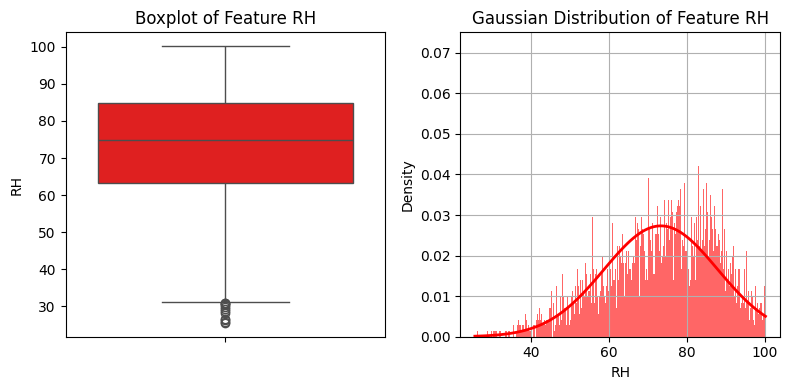

In [6]:
features_to_plot = ["AT", "V", "AP", "RH"] 
colors = ["blue", "green", "orange", "red"]

for feature, color in zip(features_to_plot, colors):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

    # Boxplot
    sns.boxplot(df[feature], ax=ax1, color=color)
    ax1.set_title(f"Boxplot of Feature {feature}")

    # Histogram and Gaussian distribution
    data = df[feature]
    mu, sigma = stats.norm.fit(data)

    ax2.hist(data, bins=1000, density=True, alpha=0.6, color=color)

    x = np.linspace(data.min(), data.max(), 100)
    y = stats.norm.pdf(x, mu, sigma)
    # Keep Gaussian distribution red for visual clarity
    ax2.plot(x, y, color='red', linewidth=2)  

    ax2.set_xlabel(feature)
    ax2.set_ylabel("Density")
    ax2.set_title(f"Gaussian Distribution of Feature {feature}")
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

## Remove outliers from the data

AP and RH has outliers, hence removing the outliers and corresponding records from the dataset. Use the Interquantile Range (IQR) for this reason. 

In [7]:
# List of features to process
features = ['AP', 'RH']  

for x in features:
    q75, q25 = np.percentile(df.loc[:, x], [75, 25])
    iqr = q75 - q25

    max_threshold = q75 + (1.5 * iqr)
    min_threshold = q25 - (1.5 * iqr)

    df.loc[df[x] < min_threshold, x] = np.nan
    df.loc[df[x] > max_threshold, x] = np.nan

In [8]:
df.isnull().sum()

AT     0
V      0
AP    88
RH    12
PE     0
dtype: int64

In [9]:
df = df.dropna(axis=0)
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [10]:
print("New shape of the Dataset after removing records containing outliers: {}".format(df.shape))

New shape of the Dataset after removing records containing outliers: (9468, 5)


# Identify features importance using Lasso

Reference: https://medium.com/@agrawalsam1997/feature-selection-using-lasso-regression-10f49c973f08

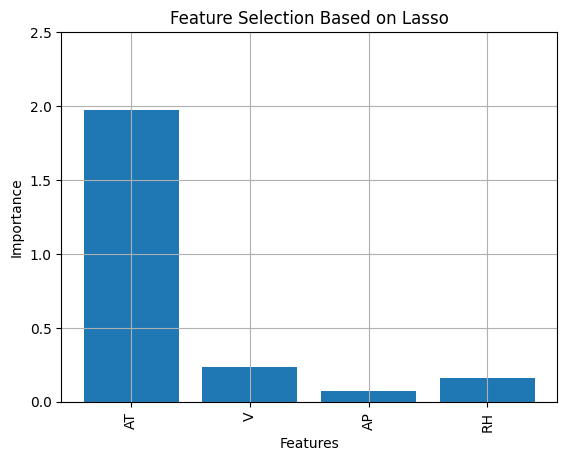

In [11]:
# Separate input features from the target 
X = df.drop("PE", axis=1).values
y = df["PE"].values
column_names = df.drop("PE", axis=1).columns

lasso = Lasso(alpha=1e-05)
lasso.fit(X, y)

# Using np.abs() to make coefficients positive.  
lasso_coef = np.abs(lasso.coef_)

# plotting the Column Names and Importance of Columns. 
plt.bar(column_names, lasso_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 2.5)
plt.show()

# Split the dataset into train set, cross validation and test set

In [12]:
# 60% for training set, put the remaining 40% in temp vars X_and y_
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=1)

# Delete temp vars X_ and y_
del X_, y_

print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {X_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {X_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (5680, 4)
the shape of the training set (target) is: (5680,)

the shape of the cross validation set (input) is: (1894, 4)
the shape of the cross validation set (target) is: (1894,)

the shape of the test set (input) is: (1894, 4)
the shape of the test set (target) is: (1894,)


# Fit a linear model

## Feature scaling

In [13]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(X_train)

print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze()}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze()}")

Computed mean of the training set: [  19.77468662   54.45346303 1013.11677993   73.38535387]
Computed standard deviation of the training set: [ 7.34781841 12.6885923   5.69063044 14.40832441]


## Train the model 

In [14]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

## Evaluate the model

Use of the following formula to calculate the MSE for training and cross validation sets

$$J_{train}(\vec{w}, b) = \frac{1}{2m_{train}}\left[\sum_{i=1}^{m_{train}}(f_{\vec{w},b}(\vec{x}_{train}^{(i)}) - y_{train}^{(i)})^2\right]$$

In [15]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

training MSE (using sklearn function): 10.260486357652155


## Scale the cross validation set

In [16]:
# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_scaled = scaler_linear.transform(X_cv)

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze()}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze()}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Mean used to scale the CV set: [  19.77468662   54.45346303 1013.11677993   73.38535387]
Standard deviation used to scale the CV set: [ 7.34781841 12.6885923   5.69063044 14.40832441]
Cross validation MSE: 10.691090397154994


# Adding polynomial features

## Create additional features

In [17]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(X_train)

print(X_train_mapped[:5])

[[2.33000000e+01 7.29900000e+01 1.00854000e+03 9.21100000e+01
  5.42890000e+02 1.70066700e+03 2.34989820e+04 2.14616300e+03
  5.32754010e+03 7.36133346e+04 6.72310890e+03 1.01715293e+06
  9.28966194e+04 8.48425210e+03]
 [2.65300000e+01 6.00700000e+01 1.01655000e+03 5.47900000e+01
  7.03840900e+02 1.59365710e+03 2.69690715e+04 1.45357870e+03
  3.60840490e+03 6.10641585e+04 3.29123530e+03 1.03337390e+06
  5.56967745e+04 3.00194410e+03]
 [2.66400000e+01 5.86900000e+01 1.00799000e+03 7.56800000e+01
  7.09689600e+02 1.56350160e+03 2.68528536e+04 2.01611520e+03
  3.44451610e+03 5.91589331e+04 4.44165920e+03 1.01604384e+06
  7.62846832e+04 5.72746240e+03]
 [2.11100000e+01 6.99400000e+01 1.00437000e+03 8.42600000e+01
  4.45632100e+02 1.47643340e+03 2.12022507e+04 1.77872860e+03
  4.89160360e+03 7.02456378e+04 5.89314440e+03 1.00875910e+06
  8.46282162e+04 7.09974760e+03]
 [1.98800000e+01 4.70300000e+01 1.01227000e+03 9.19900000e+01
  3.95214400e+02 9.34956400e+02 2.01239276e+04 1.82876120e+03


## Scale the inputs to narrow down range of values

In [18]:
# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Preview the first 5 elements of the scaled training set.
print(X_train_mapped_scaled[:5])

[[ 4.79776878e-01  1.46088207e+00 -8.04265886e-01  1.29957139e+00
   3.40740508e-01  8.67856704e-01  4.71790315e-01  1.60601884e+00
   1.55566491e+00  1.45224820e+00  2.66645068e+00 -8.04868681e-01
   1.26646960e+00  1.41407284e+00]
 [ 9.19363136e-01  4.42644608e-01  6.03311023e-01 -1.29059794e+00
   9.01150727e-01  6.97607390e-01  9.41407075e-01  1.27326522e-01
   3.40780386e-01  4.65821858e-01 -6.21481187e-01  6.01234178e-01
  -1.27464141e+00 -1.26726013e+00]
 [ 9.34333566e-01  3.33885499e-01 -9.00915985e-01  1.59258361e-01
   9.21515144e-01  6.49630958e-01  9.25678987e-01  1.32836213e+00
   2.24962871e-01  3.16061866e-01  4.80690933e-01 -9.01009457e-01
   1.31712879e-01  6.57591145e-02]
 [ 1.81729230e-01  1.22050867e+00 -1.53704937e+00  7.54747451e-01
   2.10107810e-03  5.11108248e-01  1.60967349e-01  8.21533220e-01
   1.24759577e+00  1.18753083e+00  1.87129706e+00 -1.53248203e+00
   7.01657286e-01  7.36927819e-01]
 [ 1.43326052e-02 -5.85050166e-01 -1.48802481e-01  1.29124287e+00
  

# Train the model and measure model performance

In [19]:
# Initialize the class
model =LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train )

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(X_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Training MSE: 8.937482668947714
Cross validation MSE: 9.456384904671783


## Introduce more polynomial terms to compare performance of MSE

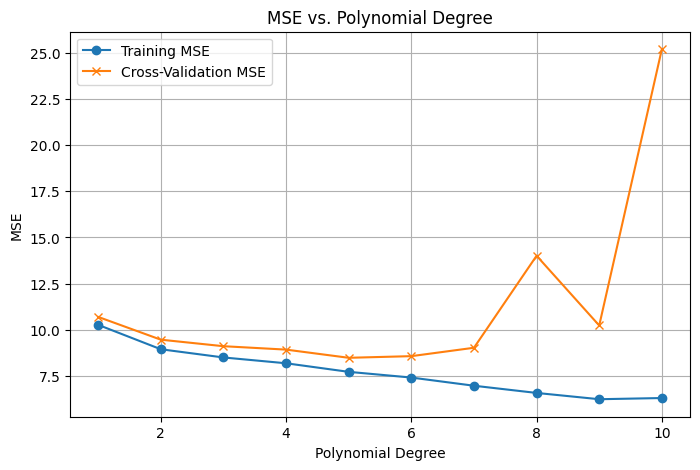

In [20]:
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(X_train)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(X_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    
# Plot the results
degrees=range(1,11)
plt.figure(figsize=(8, 5))  # Adjust figure size as needed

plt.plot(degrees, train_mses, label='Training MSE', marker='o')
plt.plot(degrees, cv_mses, label='Cross-Validation MSE', marker='x')

plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE vs. Polynomial Degree')

plt.legend()
plt.grid(True)
plt.show()

# Choosing the best model

In [21]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=5


## Compute the test set's MSE

In [22]:
# Add polynomial features to the test set
poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(X_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]}")
print(f"Cross Validation MSE: {cv_mses[degree-1]}")
print(f"Test MSE: {test_mse}")

Training MSE: 7.712307643904302
Cross Validation MSE: 8.474199102162968
Test MSE: 8.238983788078826
